**Introduction**


In this analysis  Support Vector Machines (SVM) are used to train a model to classify if an image contains a ship or not. The  feature representation method Histogram of Oriented Gradients (HOG) are used as the feature representation. Although deep learning approaches have proven there superiority in similar image recognition/classification problem, given the small size of the data set it is interesting to find out how a traditional computer vision approach performs in a situation like this.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sfbay_1.png
shipsnet.7z
shipsnet.json



In [2]:
f = open(r'../input/shipsnet.json')
dataset = json.load(f)
f.close()

dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

Load the data and see check how an image looks like

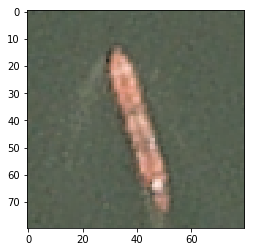

In [3]:
data = np.array(dataset['data']).astype('uint8')
img_length = 80
data = data.reshape(-1,3,img_length,img_length).transpose([0,2,3,1])

plt.imshow(data[51])

Convert the images to grayscale colorspace before calculating the HOG features for each image

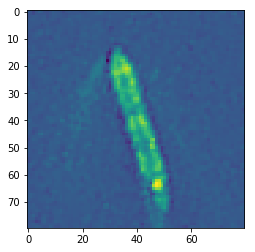

In [4]:
data_gray = [ color.rgb2gray(i) for i in data]
plt.imshow(data_gray[51])

In [5]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

The hog function of skimage returns a matrix that can be used to visualize the gradients

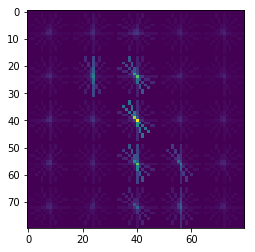

In [6]:
plt.imshow(hog_images[51])

In [7]:
labels =  np.array(dataset['labels']).reshape(len(dataset['labels']),1)

Fit a simple SVM classifier to the data . Make sure to shuffle the data before fitting it to the model

In [8]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

In [9]:
#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [10]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_pred = clf.predict(x_test)

In [12]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.905357142857


             precision    recall  f1-score   support

        0.0       0.89      0.99      0.94       419
        1.0       0.97      0.65      0.77       141

avg / total       0.91      0.91      0.90       560



This shows that we can gain considerably good results with computer vision approaches alone. 